In [12]:
## Load the data set                                  

In [13]:
# Import required libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def load_image_dataset(dataset_path):
    image_list = []
    label_list = []
    available_classes = []
    
    # Go through each folder in the directory
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        
        # Skip if not a directory
        if not os.path.isdir(folder_path):
            continue
            
        # Add class name to our list
        available_classes.append(folder_name)
        
        # Go through each image in the class folder
        for img_name in os.listdir(folder_path):
            # Check if file is an image
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, img_name)
                
                # Load and resize image
                img = Image.open(img_path)
                img = img.resize((150, 150)) 
                img = np.array(img)
                
                # Add image and label to our lists
                image_list.append(img)
                label_list.append(folder_name)
    
    return np.array(image_list), label_list, available_classes

In [15]:
def show_examples(image_array, label_array, class_list, num_examples=9):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_examples, len(image_array))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image_array[i])
        plt.title(label_array[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Number of images loaded: 3670
Classes found: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Image shape: (150, 150, 3)
daisy: 633 images
dandelion: 898 images
roses: 641 images
sunflowers: 699 images
tulips: 799 images


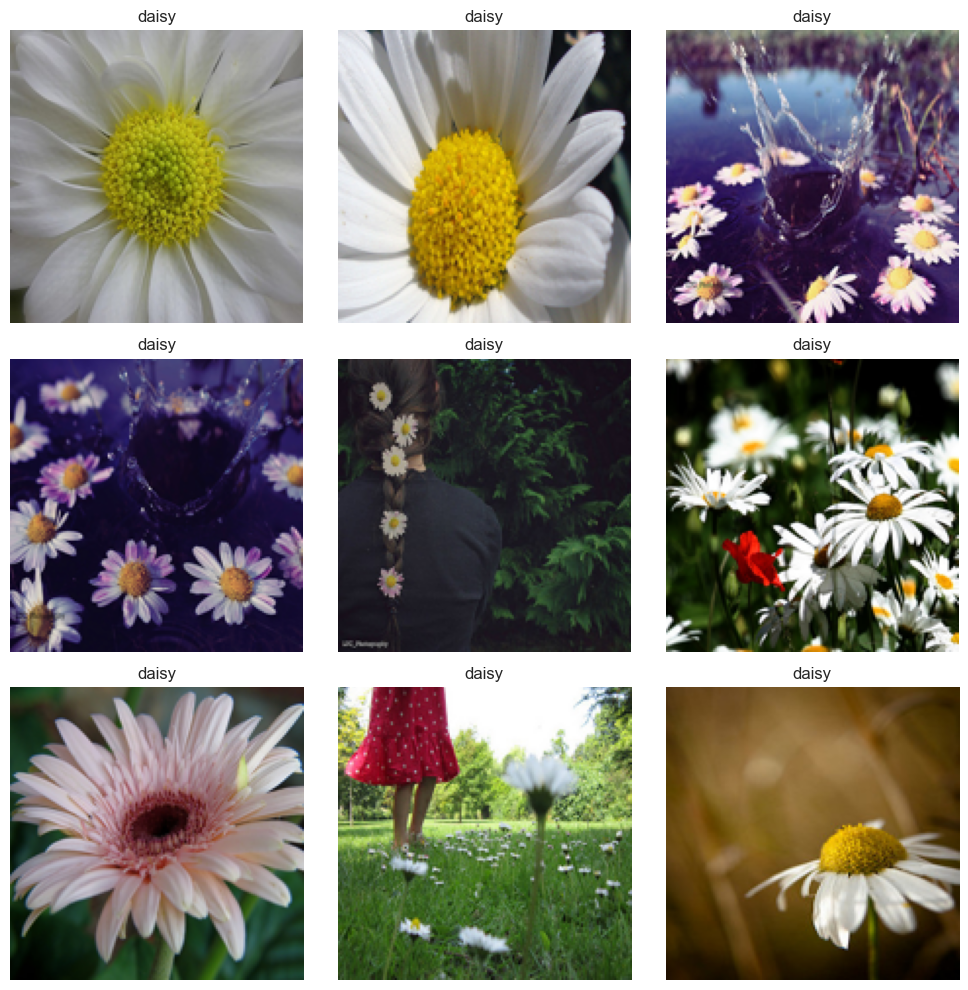

In [16]:
root_path = "C:\\Users\\metos\\Downloads\\flower_photos\\flower_photos"

# Load the dataset
loaded_images, loaded_labels, detected_classes = load_image_dataset(root_path)

# Print information about the dataset
print(f"Number of images loaded: {len(loaded_images)}")
print(f"Classes found: {detected_classes}")
print(f"Image shape: {loaded_images[0].shape}")

# Count images per class
for current_class in detected_classes:
    class_count = loaded_labels.count(current_class)
    print(f"{current_class}: {class_count} images")

# Show example images
show_examples(loaded_images, loaded_labels, detected_classes)

In [17]:
#Transform the labels to one-hot encoding
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot encoding
label_binarizer = LabelBinarizer()
loaded_labels_onehot = label_binarizer.fit_transform(loaded_labels)

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(loaded_images, loaded_labels_onehot, test_size=0.2, random_state=42)

In [19]:
# Load the pre-trained model

from keras.src.applications.vgg16 import VGG16
from keras.src.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(X_train) 
test_ds = preprocess_input(X_test)

In [20]:
base_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [22]:
from keras.src.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_ds, loaded_labels_onehot, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 552ms/step - accuracy: 0.3136 - loss: 3.4019 - val_accuracy: 0.0748 - val_loss: 4.4531
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.4076 - loss: 1.3683 - val_accuracy: 0.0323 - val_loss: 5.1918
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 541ms/step - accuracy: 0.4791 - loss: 1.1059 - val_accuracy: 0.0595 - val_loss: 4.7586
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 543ms/step - accuracy: 0.5502 - loss: 0.9853 - val_accuracy: 0.0153 - val_loss: 7.3344
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 556ms/step - accuracy: 0.5820 - loss: 0.9197 - val_accuracy: 0.0221 - val_loss: 8.4239
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.6251 - loss: 0.8394 - val_accuracy: 0.0119 - val_loss: 8.5068
